###  205229126


## step-1:

In [1]:
!pip install tweepy

In [2]:
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
CONSUMER_KEY = 'WMp281TzqSm8OalMSq7mVArBs'
CONSUMER_SECRET = 'CfygCMpOHse8E3R845pz9uSR2olW6soKcd20FD9HlSk7gCKjDF'
OAUTH_TOKEN = '893381958671056898-20Pk8r6dNCD0kXI0HwxLNc8H0bAV72I'
OAUTH_TOKEN_SECRET = '1w6wvjyzqKIQrKB1upCcyQjv8xg556HYwF6tSafu0Pj3H'

In [4]:
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
    
authenticate.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET ) 

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
recent_tweet = api.user_timeline(screen_name="vijay", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 10 tweets
print("10 recent tweets:\n")
i=1
for tweet in recent_tweet[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

10 recent tweets:

1) True . Well said Karthik https://t.co/NrMiieAUCK

2) Congratulations 😍😍😍😍😍 https://t.co/JhjZGPDe3j

3) 3 questions to ask yourself about everything you do (Stacey Abrams | TEDWomen 2018) https://t.co/5iSXwVUYma via @TEDTalks

4) RT @dailystoic: Some Stoic keys to happiness:

- Focus on what you can control
- Reduce your wants
- Read philosophy every day
- Ignore the…

5) @majorgauravarya @ImranKhanPTI @ShkhRasheed @BBhuttoZardari Wonderful news lol

6) RT @pollock: I put together all of my learnings from the last decade of building/scaling startups in this course 🤙

From community building…

7) @siddharthkr04 True . However hotmail used this vitality to grow even before PayPal .

8) RT @bbharadwaj: $170M Series A for 2 month old instant Grocery startup JOKR. 

https://t.co/f34dAE89We

9) Elon Musk's One-Word Tweet On ISRO's Gaganyaan Engine Test Success - NDTV https://t.co/3YcX8gQlka

10) https://t.co/wvUfA9AFfT



In [6]:
rt = pd.DataFrame([[tweet.user.screen_name, tweet.full_text] for tweet in recent_tweet], columns=['Tweets', 'Username'])
rt.head(10)

,Tweets,Username
0,Vijay,True . Well said Karthik https://t.co/NrMiieAUCK
1,Vijay,Congratulations 😍😍😍😍😍 https://t.co/JhjZGPDe3j
2,Vijay,3 questions to ask yourself about everything y...
3,Vijay,RT @dailystoic: Some Stoic keys to happiness:\...
4,Vijay,@majorgauravarya @ImranKhanPTI @ShkhRasheed @B...
5,Vijay,RT @pollock: I put together all of my learning...
6,Vijay,@siddharthkr04 True . However hotmail used thi...
7,Vijay,RT @bbharadwaj: $170M Series A for 2 month old...
8,Vijay,Elon Musk's One-Word Tweet On ISRO's Gaganyaan...
9,Vijay,https://t.co/wvUfA9AFfT


In [7]:
h_tag = '#vijay'
r_tweets = tweepy.Cursor(api.search,q=h_tag,lang="en", tweet_mode='extended').items(100)

In [8]:
tweets_new = []
for tweet in r_tweets:
    tweets_new.append(tweet)

In [9]:
tweets_new 

[Status(_api=<tweepy.api.API object at 0x7ff16765b9d0>, _json={'created_at': 'Fri Nov 19 09:33:26 +0000 2021', 'id': 1461628676416569344, 'id_str': '1461628676416569344', 'full_text': 'RT @BLSTG: Minimum guarantee movies in Tamil Nadu :\n\n1. #Vijay movies\n2. #Village based movies\n3. #Comedy movies\n\nIf you have atleast one o…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [{'text': 'Vijay', 'indices': [56, 62]}, {'text': 'Village', 'indices': [73, 81]}, {'text': 'Comedy', 'indices': [98, 105]}], 'symbols': [], 'user_mentions': [{'screen_name': 'BLSTG', 'name': 'BlastingTamilCinema', 'id': 176045921, 'id_str': '176045921', 'indices': [3, 9]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_repl

In [10]:
tweets_rt = pd.DataFrame()

for tweet in tweets_new:
  h_tags=[]

  try:
    for h_tag in tweet.entities['hashtags']:
      h_tags.append(h_tag['text'])
    text = api.get_status(id=tweet.id,tweet_mode='extended').full_text

  except:
    pass
 
  tweets_rt = tweets_rt.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'following' :tweet.user.friends_count,
                                               'followers' : tweet.user.followers_count,
                                               'totaltweets' : tweet.user.statuses_count,
                                               'retweetcount' : tweet.retweet_count,                                          
                                               'hashtags': [h_tag if h_tag else None],
                                               'source': tweet.source}))
  tweets_rt = tweets_rt.reset_index(drop=True)

In [11]:
tweets_rt.head()

,user_name,user_location,user_description,user_verified,date,text,following,followers,totaltweets,retweetcount,hashtags,source
0,𝐀𝐫𝐮𝐧𝐤𝐮𝐦𝐚𝐫,Villupuram,Stay Home Be Safe😷,False,2021-11-19 09:33:26,RT @BLSTG: Minimum guarantee movies in Tamil N...,315,381,108198,306,"{'text': 'Comedy', 'indices': [98, 105]}",Twitter for Android
1,Naveenrbn,"kurinjipadi, cuddalore",Ignore negativity.. Spread love.❤\nPositive th...,False,2021-11-19 09:32:54,"RT @ActorVijayFP: ""Thalapathy 66"" will be a co...",87,48,9194,229,"{'text': 'Comedy', 'indices': [98, 105]}",Twitter for Android
2,Bala,,,False,2021-11-19 09:32:00,"RT @ActorVijayFP: ""Thalapathy 66"" will be a co...",95,16,2438,229,"{'text': 'Comedy', 'indices': [98, 105]}",Twitter for Android
3,Naveenrbn,"kurinjipadi, cuddalore",Ignore negativity.. Spread love.❤\nPositive th...,False,2021-11-19 09:31:28,RT @Priya_icedoll06: Good afternoon \n\n#Beast...,87,48,9194,18,"{'text': 'Vijay', 'indices': [80, 86]}",Twitter for Android
4,ThalapathyMani😎🔥😍,"Tamil Nadu, India",🔥Thalapathy Veriyan 🔥@actorvijay 🎞🔥@Ro45 🏏AAR ...,False,2021-11-19 09:30:35,RT @BLSTG: Tamil Stars Current salary for upco...,442,294,9158,289,"{'text': 'STR', 'indices': [135, 139]}",Twitter for Android


In [12]:
twitter_h = pd.DataFrame({})

twitter_h['user'] = tweets_rt['user_name'] 
twitter_h['following'] = tweets_rt['following']
twitter_h['totaltweets'] = tweets_rt['totaltweets']
twitter_h['retweetcount'] = tweets_rt['retweetcount']
twitter_h['following'] = tweets_rt['following']

twitter_h.head(10)

,user,following,totaltweets,retweetcount
0,𝐀𝐫𝐮𝐧𝐤𝐮𝐦𝐚𝐫,315,108198,306
1,Naveenrbn,87,9194,229
2,Bala,95,2438,229
3,Naveenrbn,87,9194,18
4,ThalapathyMani😎🔥😍,442,9158,289
5,VETRI 🔱,882,21936,306
6,Mŕ§hªđőw 🥷🎭,701,48018,8
7,Cricket Fan™,1230,51308,34
8,Mersalite Nithish,21,14895,229
9,Harrish,273,90964,229


In [13]:
twitter_h.to_csv('tweets_recent.csv')

## step-2:

In [14]:
import networkx as nx
g = nx.DiGraph()

In [15]:
data = pd.read_csv('tweets_recent.csv')
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,user,following,totaltweets,retweetcount
0,𝐀𝐫𝐮𝐧𝐤𝐮𝐦𝐚𝐫,315,108198,306
1,Naveenrbn,87,9194,229
2,Bala,95,2438,229
3,Naveenrbn,87,9194,18
4,ThalapathyMani😎🔥😍,442,9158,289


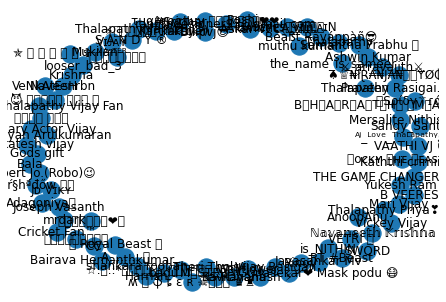

<Figure size 1800x504 with 0 Axes>

In [16]:
for i in data['user']:
   g.add_node(i)
nx.draw(g, with_labels=1)
plt.figure(figsize = (25,7))
plt.show()

## step3#

In [17]:
g.add_edge('X', 'Y')
# Print some statistics about the graph
print(nx.info(g))

DiGraph with 88 nodes and 1 edges


In [18]:
print("Nodes:", g.nodes())
print("Edges:", g.edges())
print()
# Get node properties
print("X props:", g.nodes["X"])
print("Y props:", g.nodes["Y"])
print()
# Get edge properties
print("X=>Y props:", g["X"]["Y"])
print()

Nodes: ['𝐀𝐫𝐮𝐧𝐤𝐮𝐦𝐚𝐫', 'Naveenrbn', 'Bala', 'ThalapathyMani😎🔥😍', 'VETRI 🔱', 'Mŕ§hªđőw \U0001f977🎭', 'Cricket Fan™', 'Mersalite Nithish', 'Harrish', 'Bairava Hemanthkumar', 'ʍ 🅰️ ֆ ȶ ɛ ʀ ☠ｓⒶ𝓜 ♛♜', 'French Thalapathy Vijay Fan', '𝓥𝓪𝓻𝓾𝓷', 'AnoopAnu', 'Mari Vijay', 'Dhanush ⚡', 'Legendary Actor Vijay', '🕷️Sρίδγ⚚ɾάɱ', '#Sridhar', 'τнαℓαρατнγ 𝗥𝗮𝘀𝗶𝗴𝗮𝗶❤️❤️', 'Vickey Vijay', 'Bēàßt Rãyáppàñ😎', 'Jᴅ Vɪᴋʏ', 'VeNkAtEsH', 'A........ 🤗', 'Thalapathy Rasigai...🔥😎', '⚔️ arravajith⚔️', 'S A N D Y ®', 'Thivyan Arulkumaran', '🅼🅴🆈🆈 🆅🅵🅲', 'is_NITHIN', 'badu', '♠️♕₦łⱤ₳₦J₳₦🤴👸ɎØ₲₳♕♠️', 'Theri Thols', 'Jayasankar Mv', 'Dilipvj😎', 'mrdark', 'Venkatesh vijay', 'B VEERESH', 'Praveen', 'looser_bad_3', 'Adagoniya✨', 'Yukesh Ram', 'Gods gift', 'Roshin', 'the_name_is_sameer___', 'Askar VFC', 'Rinoy', 'Aravinth A_vin', 'B💞H💞A💞R💞A💞T💞H💞 💞M💞A💞S💞T💞E💞R💞', 'Joseph Vasanth', 'Karthikeyan', 'M🔺STER _Gunasekar❤️ Mask podu 😷', 'CC', '😈 தளபதி மனோ 🔥', '𝐑ᴏᴄᴋʏ 𝐓ʜᴇ 𝐁ᴇᴀsᴛ ❗', '✯ 𝐊 𝐢 𝐫 𝐚 𝐧 ✞ ᴹᴬˢᵀᴱᴿ', 'SS Ravana', 'THE GAME CHANGER😈😈😈😈🙏♥️

In [19]:
g.nodes["X"].update({'prop1':'value1'})  # Update a node property
print('X props:', g.nodes['X'])
print()
# Update an edge property
g['X']['Y'].update({'label' : 'label1'})
print("X=>Y props:", g['X']['Y'])

X props: {'prop1': 'value1'}

X=>Y props: {'label': 'label1'}


In [20]:
from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display
import networkx as nx

In [21]:
kkg = nx.generators.small.krackhardt_kite_graph()

print ("Degree Centrality")
print (sorted(nx.degree_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print

print ("Betweenness Centrality")
print (sorted(nx.betweenness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print

print ("Closeness Centrality")
print (sorted(nx.closeness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))

Degree Centrality
[(3, 0.6666666666666666), (5, 0.5555555555555556), (6, 0.5555555555555556), (0, 0.4444444444444444), (1, 0.4444444444444444), (2, 0.3333333333333333), (4, 0.3333333333333333), (7, 0.3333333333333333), (8, 0.2222222222222222), (9, 0.1111111111111111)]
Betweenness Centrality
[(7, 0.38888888888888884), (5, 0.23148148148148148), (6, 0.23148148148148148), (8, 0.2222222222222222), (3, 0.10185185185185183), (0, 0.023148148148148143), (1, 0.023148148148148143), (2, 0.0), (4, 0.0), (9, 0.0)]
Closeness Centrality
[(5, 0.6428571428571429), (6, 0.6428571428571429), (3, 0.6), (7, 0.6), (0, 0.5294117647058824), (1, 0.5294117647058824), (2, 0.5), (4, 0.5), (8, 0.42857142857142855), (9, 0.3103448275862069)]


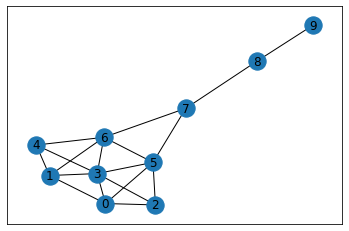

In [22]:
nx.draw_networkx(kkg)

In [23]:
print(nx.info(g))

DiGraph with 88 nodes and 1 edges


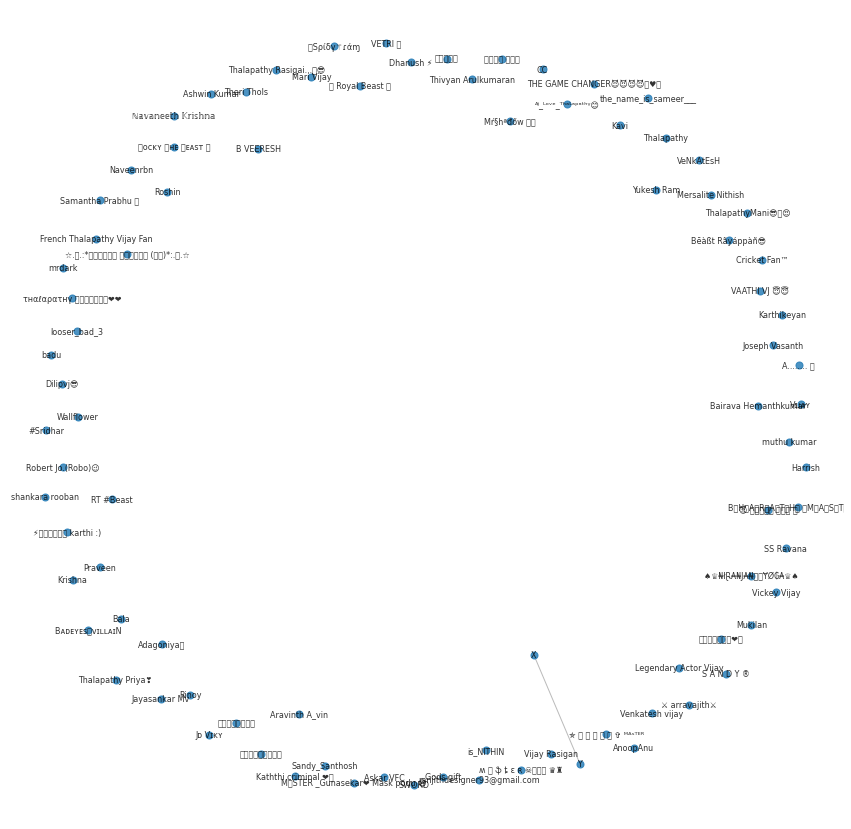

In [24]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
labels = dict([(n, n.split('(user)')[0]) for n in g.nodes()])
nx.draw(g, pos=nx.spring_layout(g),arrows=False, ax=ax, node_size=50,
edge_color='#aaaaaa', alpha=0.8, labels=labels, font_size=8)

## Density

In [25]:
G  = nx.complete_graph(100)
print (nx.density(G))
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
print (nx.density(G))

1.0
0


In [26]:
print (nx.density(g))

0.00013061650992685477


In [12]:
import flask

app = flask.Flask(__name__, static_url_path='',
            static_folder='static',
            template_folder='template')
app.config["DEBUG"] = True

In [13]:
from flask import Flask, render_template
import pandas as pd
import json
import plotly
import plotly.express as px

app = Flask(Twitter_Hashtags)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/chart1')
def chart1():
    df = pd.DataFrame({
        "Hashtags": ["#vijay", "#kollywood", "#bollywood", "#tollywood", "#actors", "Actress"],
        "No. of twitts": [12036, 345321, 4653, 54563, 6877, 98645],
        "hashtags": ["TC", "TC", "BC", "TeC", "All", "All"]
    })

    fig = px.bar(df, x="Hashtags", y="No. of twitts", color="hashtags", barmode="group")

    graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    header="Fruit in North America"
    description = """
    A academic study of the number of apples, oranges and bananas in the cities of
    San Francisco and Montreal would probably not come up with this chart.
    """
    return render_template('notdash2.html', graphJSON=graphJSON, header=header,description=description)

@app.route('/chart2')
def chart2():
    df = pd.DataFrame({
        "Vegetables": ["Lettuce", "Cauliflower", "Carrots", "Lettuce", "Cauliflower", "Carrots"],
        "Amount": [10, 15, 8, 5, 14, 25],
        "City": ["London", "London", "London", "Madrid", "Madrid", "Madrid"]
    })

    fig = px.bar(df, x="Vegetables", y="Amount", color="City", barmode="stack")

    graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
    header="Vegetables in Europe"
    description = """
    The rumor that vegetarians are having a hard time in London and Madrid can probably not be
    explained by this chart.
    """
    return render_template('notdash2.html', graphJSON=graphJSON, header=header,description=description)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-5445c4a483a1>", line 4, in <module>
    import plotly
ModuleNotFoundError: No module named 'plotly'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\ProgramData\Anaconda3\lib\site-packages\I

ModuleNotFoundError: No module named 'plotly'